#**Setup**

In [1]:
! pip install "unstructured[all-docs]" pillow pydantic lxml pillow matplotlib

In [2]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.6).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [3]:
!sudo apt-get install libleptonica-dev tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libleptonica-dev is already the newest version (1.82.0-3build1).
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-script-latn is already the newest version (1:4.00~git30-7274cfa-1.1).
python3-pil is already the newest version (9.0.1-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [4]:
!pip install unstructured-pytesseract
!pip install tesseract-ocr

  Preparing metadata (setup.py) ... done
  Created wheel for tesseract-ocr: filename=tesseract_ocr-0.0.1-cp311-cp311-linux_x86_64.whl size=179085 sha256=b8eff8fd1be6ed418d7635fc7345d8a00375d9b764ff3fb8f314eb20e6428ed5
  Stored in directory: /root/.cache/pip/wheels/90/83/3c/d2b68d844d169d6015fc2ad8c93207d778829c87e26c6f2206
Successfully built tesseract-ocr


In [5]:
!pip install langchain_core langchain langchain-community  langchain-groq
!pip install chromadb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 19.1 MB/s eta 0:

In [6]:
!pip install langchain_huggingface

##**Env Variables**

In [8]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
hf_token = userdata.get('HF_TOKEN')

#**Data ingestion**

In [9]:
from unstructured.partition.pdf import partition_pdf

In [10]:
filename = "/content/attention is all you need.pdf"

In [11]:
raw_pdf_elements = partition_pdf(
    filename = "/content/attention is all you need.pdf",                            # mandatory
    # infer_table_structure=True,                       # deprecated
    strategy="hi_res",                                 # mandatory to use ``hi_res`` strategy
    extract_images_in_pdf=True,                       # mandatory to set as ``True``
    extract_image_block_types=["Image", "Table"],          # optional
    extract_image_block_to_payload=False,                  # optional
    extract_image_block_output_dir="extracted_data",  # optional - only works when ``extract_image_block_to_payload=False``
    )


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

In [12]:
len(raw_pdf_elements), raw_pdf_elements[0]

(217, <unstructured.documents.elements.Text at 0x7e50152dc950>)

In [13]:
Header=[]
Footer=[]
Title=[]
NarrativeText=[]
Text=[]
ListItem=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Header" in str(type(element)):
            Header.append(str(element))
  elif "unstructured.documents.elements.Footer" in str(type(element)):
            Footer.append(str(element))
  elif "unstructured.documents.elements.Title" in str(type(element)):
            Title.append(str(element))
  elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
            NarrativeText.append(str(element))
  elif "unstructured.documents.elements.Text" in str(type(element)):
            Text.append(str(element))
  elif "unstructured.documents.elements.ListItem" in str(type(element)):
            ListItem.append(str(element))


##**Images**

In [14]:
image = []
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Image" in str(type(element)):
            image.append(str(element))

In [15]:
image[0]
print(f"the number of images found are:",len(image))


the number of images found are: 7


##**Tables**

In [16]:
Table = []
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Table" in str(type(element)):
            Table.append(str(element))

In [17]:
Table[0]
print(f"the number of Tables found are:",len(Table))


the number of Tables found are: 4


##**Text**

In [18]:
Text=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.NarrativeText" in str(type(element)):
            Text.append(str(element))

In [19]:
Text[0]
print(f"the number of Text chunks found are:",len(Text))

the number of Text chunks found are: 83


#**Summarization**

In [20]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq

##**Table summary**

In [21]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing tables for retrieval. \
    Dont say here is a summary for your query, just summarize the table. \
    These summaries will be embedded and used to retrieve the raw table elements. \
    Give a concise summary of the table that is well optimized for retrieval. Table:{element} """

In [22]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [23]:
model = ChatGroq(api_key = groq_api_key,
                 temperature=0, model="gemma2-9b-it")

In [24]:
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [25]:
table_summaries = []
table_summaries = summarize_chain.batch(Table, {"max_concurrency": 5})

In [26]:
len(table_summaries)

4

In [27]:
for table_summary in table_summaries:
  print(table_summary)

The table compares the complexity of different neural network layers.  It shows the complexity per layer (O(n2 · d) for example), the sequential maximum path length, and the number of operations.  Layer types include Self-Attention, Recurrent, Convolutional, and a restricted version of Self-Attention.  


This table compares the performance of various machine translation models on English-to-German (EN-DE) and English-to-French (EN-FR) tasks. Metrics include BLEU scores and training costs measured in FLOPs (floating-point operations).  Models range from ByteNet to Transformer (base and big), with different architectures and training techniques like Deep-Att, PosUnk, GNMT + RL, ConvS2S, and MoE.  Ensemble versions of some models are also included.  


The table presents experimental results for different model configurations. It shows metrics like PPL (perplexity), BLEU score, and the number of parameters for various settings of dmodel, dff, h, dk, dv, Pdrop, ϵls, train steps.  The conf

In [28]:
table_summaries[0]

'The table compares the complexity of different neural network layers.  It shows the complexity per layer (O(n2 · d) for example), the sequential maximum path length, and the number of operations.  Layer types include Self-Attention, Recurrent, Convolutional, and a restricted version of Self-Attention.  \n\n'

##**Image Summary**

In [29]:
import base64
import os
from langchain_core.messages import HumanMessage

In [30]:
# to pass to the api call must be in base64
def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [31]:
def image_summarize(img_base64, prompt):
    """Make image summary"""
    chat = ChatGroq(api_key =groq_api_key ,temperature=0, model="llama-3.2-11b-vision-preview")
    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

In [32]:
def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))


    return img_base64_list, image_summaries

In [33]:
fpath = "/content/extracted_data"

In [34]:
# Image summaries
img_base64_list, image_summaries = generate_img_summaries(fpath)

In [35]:
img_base64_list[5]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHYA4UDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0KHxFq3ifxxrmhaVqMGmW2iiJZHMAlluJHBJwGOFRcY6ZOeorS8O3/iQeKdV0nxA1nJFDbwy2U9rEYxKpZw5YFjhuFBGcDt1rnfGfw4vr7XT4v8F6t/Z2v7cSLn91c4GMHqAcAA5BBwM461N4F+JFxrI1XS/EenGw8QaPE0l

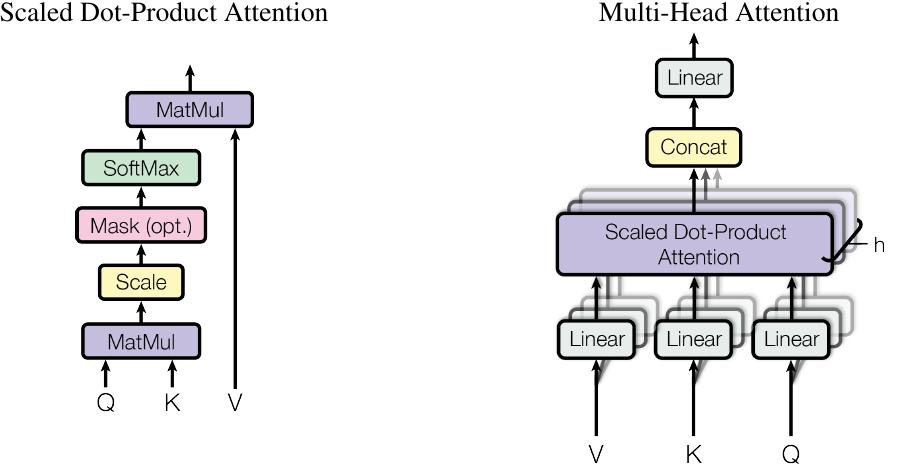

In [36]:
# display image
import base64
from IPython.display import Image, display
def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(img_base64_list[5])

In [37]:
image_summaries[5]

'The image presents a flowchart illustrating the process of scaled dot-product attention and multi-head attention in deep learning models. The flowchart is divided into two main sections: Scaled Dot-Product Attention and Multi-Head Attention.\n\n**Scaled Dot-Product Attention**\n\n*   This section consists of three sub-sections:\n    *   **MatMul**: This sub-section represents the matrix multiplication operation, which is used to compute the dot product of two matrices.\n    *   **SoftMax**: This sub-section represents the softmax activation function, which is used to normalize the output of the matrix multiplication.\n    *   **Mask (opt.)**: This sub-section represents the optional masking operation, which is used to prevent the model from attending to certain positions in the input sequence.\n\n**Multi-Head Attention**\n\n*   This section consists of four sub-sections:\n    *   **Linear**: This sub-section represents the linear transformation operation, which is used to project the 

We see that we've created summaries for all images , including images for tables --> should be fixed unless we have redundant


#**MultiVector Retrieval**

In [38]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever  # for multivector
from langchain.storage import InMemoryStore                         # for doc store
from langchain_community.vectorstores import Chroma                 #vector database
from langchain_core.documents import Document                       # langchain document type

# open source embeddings
# from langchain_community.embeddings import GPT4AllEmbeddings
from langchain_huggingface import HuggingFaceEmbeddings


##**Intialize Embeddings**

In [39]:
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
embeddings

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

##**VectorStore and MultiRetriever**

In [40]:
vectorstore = Chroma(
    collection_name="mm_rag_pdf", embedding_function=embeddings)

# Initialize the document storage layer
store = InMemoryStore()
id_key = "doc_id"

# Create the multi-vector retriever
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)


<ipython-input-40-fa52b1b6c28f>:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(


##**populating the vectoreDB**

In [41]:
def add_documents_to_retriever(summaries, original_contents):
    doc_ids = [str(uuid.uuid4()) for _ in summaries]
    summary_docs = [
        Document(page_content=s, metadata={id_key: doc_ids[i]})
        for i, s in enumerate(summaries)
    ]
    retriever.vectorstore.add_documents(summary_docs)
    retriever.docstore.mset(list(zip(doc_ids, original_contents)))

In [42]:
# no need for text summaries --> already small chunks
add_documents_to_retriever(Text, Text)

# Add table summaries
add_documents_to_retriever(table_summaries, Table)

In [43]:
# Add image summaries
add_documents_to_retriever(image_summaries, img_base64_list)

##**Check retireval**

In [44]:
docs= retriever.invoke("How is the scaled dot product attention calculated?")

In [45]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

Figure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several attention layers running in parallel.

--------------------------------------------------------------------------------
We call our particular attention "Scaled Dot-Product Attention" (Figure 2). The input consists of queries and keys of dimension dk, and values of dimension dv. We compute the dot products of the √ dk, and apply a softmax function to obtain the weights on the query with all keys, divide each by values.

--------------------------------------------------------------------------------
While for small values of dk the two mechanisms perform similarly, additive attention outperforms dot product attention without scaling for larger values of dk [3]. We suspect that for large values of dk, the dot products grow large in magnitude, pushing the softmax function into regions where it has extremely small gradients 4. To counteract this effect, we scale the dot products by 1√ . dk

---

In [46]:
docs= retriever.invoke("What is the BLEU score of the model in English to German translation EN-DE? ")
docs

['On the WMT 2014 English-to-French translation task, our big model achieves a BLEU score of 41.0, outperforming all of the previously published single models, at less than 1/4 the training cost of the previous state-of-the-art model. The Transformer (big) model trained for English-to-French used dropout rate Pdrop = 0.1, instead of 0.3.',
 'Model BLEU EN-DE EN-FR Training Cost (FLOPs) EN-DE EN-FR ByteNet [18] 23.75 Deep-Att + PosUnk [39] 39.2 1.0 · 1020 GNMT + RL [38] 24.6 39.92 2.3 · 1019 1.4 · 1020 ConvS2S [9] 25.16 40.46 9.6 · 1018 1.5 · 1020 MoE [32] 26.03 40.56 2.0 · 1019 1.2 · 1020 Deep-Att + PosUnk Ensemble [39] 40.4 8.0 · 1020 GNMT + RL Ensemble [38] 26.30 41.16 1.8 · 1020 1.1 · 1021 ConvS2S Ensemble [9] 26.36 41.29 7.7 · 1019 1.2 · 1021 Transformer (base model) 27.3 38.1 3.3 · 1018 Transformer (big) 28.4 41.8 2.3 · 1019',
 'On the WMT 2014 English-to-German translation task, the big transformer model (Transformer (big) in Table 2) outperforms the best previously reported mode

In [47]:
docs= retriever.invoke("Show me a picture that shows the difference between Scaled Dot-Product Attention and Multi-Head Attention.")
docs

['Figure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several attention layers running in parallel.',
 '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHYA4UDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0KHxFq3ifxxrmhaVqMGmW2iiJZHMA

In [48]:
docs= retriever.invoke("Which optimizer was used when training the models? ")
docs

['This section describes the training regime for our models.',
 'We used the Adam optimizer [20] with β1 = 0.9, β2 = 0.98 and ϵ = 10−9. We varied the learning rate over the course of training, according to the formula:',
 'N dmodel dff h dk dv Pdrop ϵls train steps PPL (dev) BLEU params (dev) ×106 base 6 512 2048 8 64 64 0.1 0.1 100K 4.92 25.8 65 1 512 512 5.29 24.9 (A) 4 16 128 32 128 32 5.00 4.91 25.5 25.8 32 16 16 5.01 25.4 (B) 16 32 5.16 5.01 25.1 25.4 58 60 2 6.11 23.7 36 4 5.19 25.3 50 8 4.88 25.5 80 (C) 256 32 32 5.75 24.5 28 1024 128 128 4.66 26.0 168 1024 5.12 25.4 53 4096 4.75 26.2 90 0.0 5.77 24.6 (D) 0.2 0.0 4.95 4.67 25.5 25.3 0.2 5.47 25.7 (E) positional embedding instead of sinusoids 4.92 25.7',
 'This corresponds to increasing the learning rate linearly for the first warmup_steps training steps, and decreasing it thereafter proportionally to the inverse square root of the step number. We used warmup_steps = 4000.']

In [49]:
docs= retriever.invoke("How long were the base and big models trained? ")
docs

['This section describes the training regime for our models.',
 'We trained our models on one machine with 8 NVIDIA P100 GPUs. For our base models using the hyperparameters described throughout the paper, each training step took about 0.4 seconds. We trained the base models for a total of 100,000 steps or 12 hours. For our big models,(described on the bottom line of table 3), step time was 1.0 seconds. The big models were trained for 300,000 steps (3.5 days).',
 'For the base models, we used a single model obtained by averaging the last 5 checkpoints, which were written at 10-minute intervals. For the big models, we averaged the last 20 checkpoints. We used beam search with a beam size of 4 and length penalty α = 0.6 [38]. These hyperparameters were chosen after experimentation on the development set. We set the maximum output length during inference to input length + 50, but terminate early when possible [38].',
 'We also experimented with using learned positional embeddings [9] inste

#**Multi retieval chain**

##**Utils**

In [50]:
import io
import re

from IPython.display import HTML, display
from PIL import Image

In [51]:
def plt_img_base64(img_base64):
    """Disply base64 encoded string as image"""
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))

In [52]:
def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


In [53]:
def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xff\xd8\xff": "jpg",
        b"\x89\x50\x4e\x47\x0d\x0a\x1a\x0a": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False

In [54]:
def resize_base64_image(base64_string, size=(128, 128)):
    """
    Resize an image encoded as a Base64 string
    """
    # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [55]:
def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []
    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)
    return {"images": b64_images, "texts": texts}


In [56]:
def img_prompt_func(data_dict):
    """
    Join the context into a single string
    """
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text for analysis
    text_message = {
        "type": "text",
        "text": (
            "You are an AI Researcher tasking with providing Research papers.\n"
            "You will be given a mixed of text, tables, and image(s) usually of charts or graphs.\n"
            "Use this information to provide answer Research questions related to the user question. \n"
            f"User-provided question: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]


##**Final Chain**

In [57]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

In [58]:
def multi_modal_rag_chain(retriever):
    """
    Multi-modal RAG chain
    """

    # Multi-modal LLM
    model = ChatGroq(api_key = groq_api_key,
                 temperature=0, model="llama-3.2-11b-vision-preview")

    # RAG pipeline
    chain = (
        {
            "context": retriever | RunnableLambda(split_image_text_types),
            "question": RunnablePassthrough(),
        }
        | RunnableLambda(img_prompt_func)
        | model
        | StrOutputParser()
    )

    return chain


# Create RAG chain
chain_multimodal_rag = multi_modal_rag_chain(retriever)

In [59]:
# Multi-modal LLM
model = ChatGroq(api_key = groq_api_key,
              temperature=0, model="llama-3.2-11b-vision-preview")

chain_with_sources = {
    "context": retriever | RunnableLambda(split_image_text_types),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(img_prompt_func)
        | model
        | StrOutputParser()
    )
)

#**testing the RAG pipeline**

##**RAG pipeline without returning context**

In [60]:
query = "How is the scaled dot product attention calculated? "
docs = chain_multimodal_rag.invoke(query)

In [61]:
docs

'The scaled dot-product attention is calculated by taking the dot product of the query and key vectors, scaling the result by 1/√dk, and then applying a softmax function to obtain the weights on the query with all keys. The final output is computed as a weighted sum of the values, where the weights are determined by the softmax function.\n\n**Answer:** The scaled dot-product attention is calculated by taking the dot product of the query and key vectors, scaling the result by 1/√dk, and then applying a softmax function to obtain the weights on the query with all keys. The final output is computed as a weighted sum of the values, where the weights are determined by the softmax function.'

In [62]:
query = "Which optimizer was used when training the models?"
docs = chain_multimodal_rag.invoke(query)
docs

'Based on the provided text, the optimizer used when training the models is the Adam optimizer [20]. \n\nHere are the specific hyperparameters used for the Adam optimizer:\n\n- β1 = 0.9\n- β2 = 0.98\n- ϵ = 10−9\n\nThese hyperparameters are commonly used for the Adam optimizer, which is a popular choice for deep learning models due to its ability to adapt to the learning rate of each parameter individually.'

In [63]:
query = "How long were the base and big models trained? "
docs = chain_multimodal_rag.invoke(query)
docs

'Based on the provided text, the training duration for the base and big models can be calculated as follows:\n\n**Base Model:**\n- Total training steps: 100,000\n- Time per training step: 0.4 seconds\n- Total training time: 100,000 steps * 0.4 seconds/step = 40,000 seconds\n- Converting total training time to hours: 40,000 seconds / 3600 seconds/hour = 11.11 hours\n- However, the text states that the base models were trained for a total of 12 hours.\n\n**Big Model:**\n- Total training steps: 300,000\n- Time per training step: 1.0 second\n- Total training time: 300,000 steps * 1.0 second/step = 300,000 seconds\n- Converting total training time to days: 300,000 seconds / 86,400 seconds/day = 3.47 days\n- However, the text states that the big models were trained for 3.5 days.\n\nTherefore, the base models were trained for 12 hours, and the big models were trained for 3.5 days.'

In [64]:
query = "What is the BLEU score of the model in English to German translation EN-DE?"
docs = chain_multimodal_rag.invoke(query)
docs

'Based on the provided text and table, we can answer the research question about the BLEU score of the model in English to German translation (EN-DE).\n\nAccording to the text, the big transformer model (Transformer (big)) achieves a BLEU score of **28.4** on the WMT 2014 English-to-German translation task, which is a new state-of-the-art BLEU score and outperforms the best previously reported models by more than 2.0 BLEU.\n\nHere is a summary of the BLEU scores for the EN-DE task from the table:\n\n| Model | BLEU Score (EN-DE) |\n| --- | --- |\n| ByteNet [18] | 23.75 |\n| Deep-Att + PosUnk [39] | 39.2 |\n| GNMT + RL [38] | 24.6 |\n| ConvS2S [9] | 25.16 |\n| MoE [32] | 26.03 |\n| Deep-Att + PosUnk Ensemble [39] | 40.4 |\n| GNMT + RL Ensemble [38] | 26.30 |\n| ConvS2S Ensemble [9] | 26.36 |\n| Transformer (base model) | 27.3 |\n| Transformer (big) | **28.4** |\n\nNote that the BLEU score of 28.4 is the highest score achieved by the big transformer model on the EN-DE task.'

In [66]:
query = "Show me a picture that shows the difference between Scaled Dot-Product Attention and Multi-Head Attention"
docs = chain_multimodal_rag.invoke(query)
docs

BadRequestError: Error code: 400 - {'error': {'message': 'Too many images provided.  This model supports up to 1 images', 'type': 'invalid_request_error'}}

##**Pipeline with context returned**

In [67]:
query = "How long were the base and big models trained? "
response = chain_with_sources.invoke(query)
response

{'context': {'images': [],
  'texts': ['This section describes the training regime for our models.',
   'We trained our models on one machine with 8 NVIDIA P100 GPUs. For our base models using the hyperparameters described throughout the paper, each training step took about 0.4 seconds. We trained the base models for a total of 100,000 steps or 12 hours. For our big models,(described on the bottom line of table 3), step time was 1.0 seconds. The big models were trained for 300,000 steps (3.5 days).',
   'For the base models, we used a single model obtained by averaging the last 5 checkpoints, which were written at 10-minute intervals. For the big models, we averaged the last 20 checkpoints. We used beam search with a beam size of 4 and length penalty α = 0.6 [38]. These hyperparameters were chosen after experimentation on the development set. We set the maximum output length during inference to input length + 50, but terminate early when possible [38].',
   'We also experimented with u

####**Example 2**

In [ ]:
query = "How is the scaled dot product attention calculated?"
docs = chain_multimodal_rag.invoke(query)
docs

'The scaled dot-product attention is calculated by computing the dot products of the queries and keys, dividing each by the square root of the key dimension (dk), and applying a softmax function to obtain the weights on the query with all keys. The formula for this calculation is:\n\nScaled Dot-Product Attention = softmax(queries * keys / √dk)\n\nwhere:\n\n*   queries: the input queries of dimension dk\n*   keys: the input keys of dimension dk\n*   dk: the dimension of the queries and keys\n*   softmax: the softmax function\n\nThis calculation is used in the Transformer architecture to compute attention weights between different positions in the input sequence.'

##**Test to show some images**

In [68]:
query = "How is the scaled dot product attention calculated? "
response = chain_with_sources.invoke(query)


In [69]:
response

{'context': {'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJYBRQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKK

Response: The scaled dot-product attention is calculated by taking the dot product of the query and key vectors, scaling the result by 1/√dk, and then applying a softmax function to obtain the weights on the query with all keys. The final output is computed as a weighted sum of the values, where the weights are determined by the softmax function.

**Answer:** The scaled dot-product attention is calculated by taking the dot product of the query and key vectors, scaling the result by 1/√dk, and then applying a softmax function to obtain the weights on the query with all keys. The final output is computed as a weighted sum of the values, where the weights are determined by the softmax function.
Figure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several attention layers running in parallel.

--------------------------------------------------

We call our particular attention "Scaled Dot-Product Attention" (Figure 2). The input consists of queries and ke


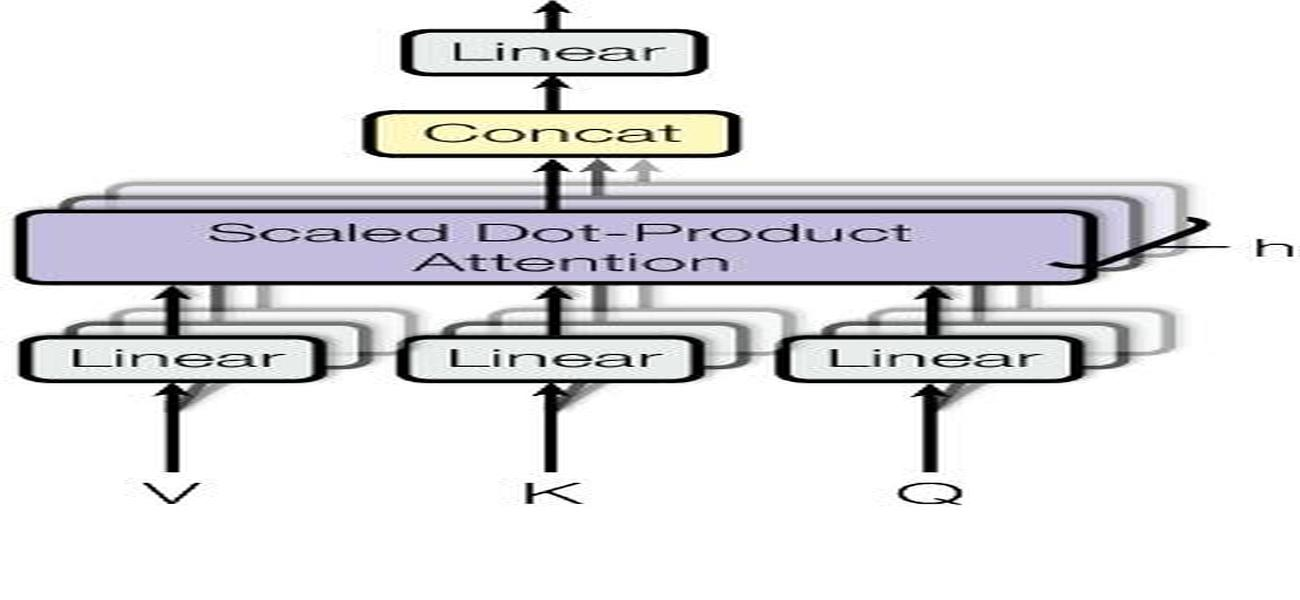

In [75]:
print("Response:", response['response'])

for text in response['context']['texts']:
  print(text)
  print("\n" + "-"*50 + "\n")

for image in response['context']['images']:
  print(f"img in the encoded format{image}")
  plt_img_base64(image)

#**UI**

In [77]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 86.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: aiofiles
    Found existing installation: aiofiles 24.1.0
    Uninstalling aiofiles-24.1.0:
      Successfully uninstalled aiofiles-24.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
unstructured-client 0.29.0 requires aiofiles>=24.1.0, but you have aiofiles 23.2.1 which is incompatible.


In [ ]:
import gradio as gr

def query_handler(user_query, use_retrieved_resources):
    if use_retrieved_resources:
        response = chain_with_sources.invoke(user_query)
        response_text = response['response']
        context_text = "\n".join(response['context']['texts'])
        images = response['context']['images']
    else:
        response_text = chain_multimodal_rag.invoke(user_query)
        context_text = ""
        images = []

    return response_text, context_text, images

def gradio_interface():
    with gr.Blocks() as demo:
        gr.Markdown("## RAG Query System")
        with gr.Row():
            with gr.Column():
                user_query = gr.Textbox(label="Enter your query")
                use_retrieved_resources = gr.Checkbox(label="Use Retrieved Resources", value=False)
                submit = gr.Button("Submit")
            with gr.Column():
                response_box = gr.Textbox(label="Response", interactive=False)
                context_box = gr.Textbox(label="Context", interactive=False)
                image_output = gr.Gallery(label="Images")

        submit.click(fn=query_handler, inputs=[user_query, use_retrieved_resources], outputs=[response_box, context_box, image_output])
    return demo

demo = gradio_interface()
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f2504b91d72e587c56.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [84]:
import gradio as gr
import base64
from io import BytesIO
from PIL import Image

def display_base64_image(base64_string):
    image_data = base64.b64decode(base64_string)
    image = Image.open(BytesIO(image_data))

    return image

def query_handler(user_query, use_retrieved_resources):
    if use_retrieved_resources:
        response = chain_with_sources.invoke(user_query)
        response_text = response['response']
        context_text = "\n".join(response['context']['texts'])
        images = [display_base64_image(img) for img in response['context']['images']]
    else:
        response_text = chain_multimodal_rag.invoke(user_query)
        context_text = ""
        images = []

    return response_text, context_text, images

def gradio_interface():
    with gr.Blocks() as demo:
        gr.Markdown("## Multimodal-RAG Query System")
        with gr.Row():
            with gr.Column():
                user_query = gr.Textbox(label="Enter your query")
                use_retrieved_resources = gr.Checkbox(label="show Retrieved Resources", value=False)
                submit = gr.Button("Submit")
            with gr.Column():
                response_box = gr.Textbox(label="Response", interactive=False)
                context_box = gr.Textbox(label="Context", interactive=False)
                image_output = gr.Gallery(label="Images")

        submit.click(fn=query_handler, inputs=[user_query, use_retrieved_resources], outputs=[response_box, context_box, image_output])
    return demo

demo = gradio_interface()
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://64183b56857225ac08.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
